In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from random import random
from random import seed

matplotlib.style.use('ggplot')
%matplotlib inline
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

# Data Cortex Nuclear

In [3]:
# importing data from localhost path
path = r"C:\Users\Arshnoor\Desktop\DSA SEM02\8004_Data_Mining\Project\Data_Cortex_Nuclear.xls"
df3 = pd.read_excel(path)

# convert class categories into numberic code i.e. 0 to 7
df3['class'] = df3['class'].astype('category')
class_label = df3.filter(items = ['class'])
df3['class'] = class_label.apply(lambda x: x.cat.codes)

# slpit df3 into training (70%) and testing (30%) datasets 
data_split = np.random.rand(len(df3)) < 0.7
train_data = df3[data_split]
test_data = df3[~data_split]

# select five features for train dataset
X2 = train_data.filter(items = ["NUMB_N", "pPKCG_N", "S6_N", "BAX_N", "Tau_N"])
# select class labels for train dataset
Y2 = train_data.filter(items = ['class'])

# select five features for test dataset
X3 = test_data.filter(items = ["NUMB_N", "pPKCG_N", "S6_N", "BAX_N", "Tau_N"])
# select class labels for test dataset
Y3 = test_data.filter(items = ['class'])

# count the number of missing values by attribute
np.sum(pd.isnull(X2.as_matrix()), axis = 0)

array([0, 0, 0, 0, 0])

mean of attribute_1:  0.1810405942597401
median of attribute_1:  0.178225639
variance of attribute_1:  0.0008367089459438669


Text(0,0.5,'Frequency')

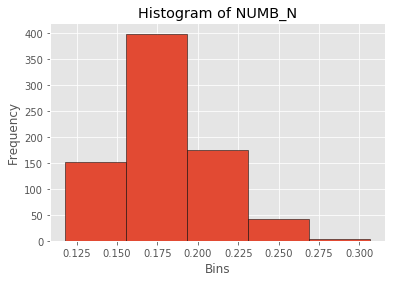

In [4]:
# feature one
plt.hist(X2['NUMB_N'], bins = 5, edgecolor = 'black')
print('mean of attribute_1: ', X2['NUMB_N'].mean(axis =0)) 
print('median of attribute_1: ', X2['NUMB_N'].median(axis =0))
print('variance of attribute_1: ', X2['NUMB_N'].var(axis =0)) 
plt.title('Histogram of NUMB_N')
plt.xlabel('Bins')
plt.ylabel('Frequency')

mean of attribute_2:  1.6960008641259754
median of attribute_2:  1.6532859085
variance of attribute_2:  0.3334692558957758


Text(0,0.5,'Frequency')

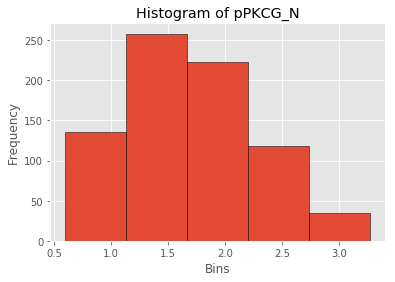

In [5]:
# feature two
plt.hist(X2['pPKCG_N'], bins = 5, edgecolor = 'black')
print('mean of attribute_2: ', X2['pPKCG_N'].mean(axis =0)) 
print('median of attribute_2: ', X2['pPKCG_N'].median(axis =0))
print('variance of attribute_2: ', X2['pPKCG_N'].var(axis =0)) 
plt.title('Histogram of pPKCG_N')
plt.xlabel('Bins')
plt.ylabel('Frequency')

mean of attribute_3:  0.4277303478545453
median of attribute_3:  0.39636527850000003
variance of attribute_3:  0.019167185939460363


Text(0,0.5,'Frequency')

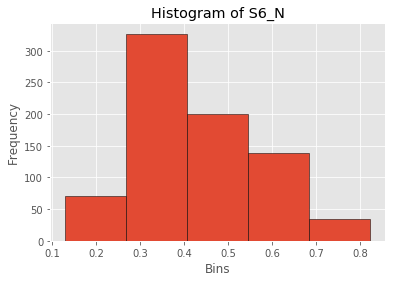

In [6]:
# feature three
plt.hist(X2['S6_N'], bins = 5, edgecolor = 'black')
print('mean of attribute_3: ', X2['S6_N'].mean(axis =0)) 
print('median of attribute_3: ', X2['S6_N'].median(axis =0))
print('variance of attribute_3: ', X2['S6_N'].var(axis =0)) 
plt.title('Histogram of S6_N')
plt.xlabel('Bins')
plt.ylabel('Frequency')

mean of attribute_4:  0.17948894278441585
median of attribute_4:  0.180885662
variance of attribute_4:  0.0003629196272671715


Text(0,0.5,'Frequency')

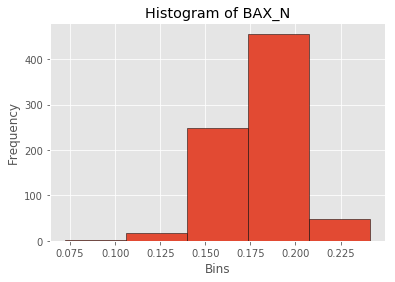

In [7]:
# feature four
plt.hist(X2['BAX_N'], bins = 5, edgecolor = 'black')
print('mean of attribute_4: ', X2['BAX_N'].mean(axis =0)) 
print('median of attribute_4: ', X2['BAX_N'].median(axis =0))
print('variance of attribute_4: ', X2['BAX_N'].var(axis =0)) 
plt.title('Histogram of BAX_N')
plt.xlabel('Bins')
plt.ylabel('Frequency')

mean of attribute_5:  0.21026461050779266
median of attribute_5:  0.188719666
variance of attribute_5:  0.004660547341078089


Text(0,0.5,'Frequency')

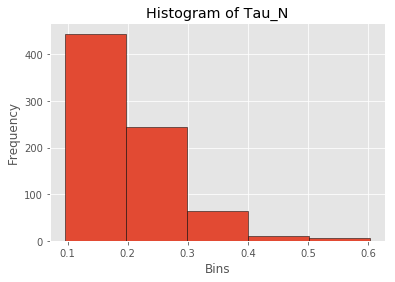

In [8]:
# feature five
plt.hist(X2['Tau_N'], bins = 5, edgecolor = 'black')
print('mean of attribute_5: ', X2['Tau_N'].mean(axis =0)) 
print('median of attribute_5: ', X2['Tau_N'].median(axis =0))
print('variance of attribute_5: ', X2['Tau_N'].var(axis =0)) 
plt.title('Histogram of Tau_N')
plt.xlabel('Bins')
plt.ylabel('Frequency')

mean of attribute_5: 3.425974025974026
median of attribute_5:  3.0
variance of attribute_5:  5.363173627412898


Text(0,0.5,'Frequency')

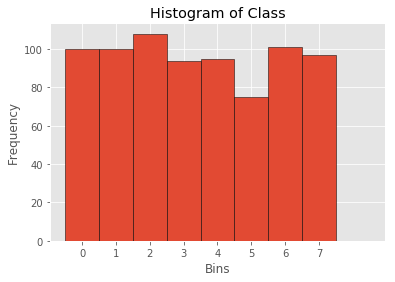

In [9]:
# class variable
dist = Y2['class'].value_counts()
plt.hist(Y2, bins = [0,1,2,3,4,5,6,7,8,9], ec = 'black', align = 'left')
print('mean of attribute_5:', Y2['class'].mean(axis =0)) 
print('median of attribute_5: ', Y2['class'].median(axis =0))
print('variance of attribute_5: ',Y2['class'].var(axis =0))
plt.title('Histogram of Class')
plt.xlabel('Bins')
plt.ylabel('Frequency')

In [10]:
dist = Y2['class'].value_counts()

In [11]:
# correlation matrix
corr_matrix = np.corrcoef(X2.T)
pd.DataFrame(corr_matrix)

,0,1,2,3,4
0,1.000000,0.060557,0.619334,0.621648,0.302205
1,0.060557,1.000000,0.293860,0.109470,0.171566
2,0.619334,0.293860,1.000000,0.228653,0.462510
3,0.621648,0.109470,0.228653,1.000000,0.200255
4,0.302205,0.171566,0.462510,0.200255,1.000000


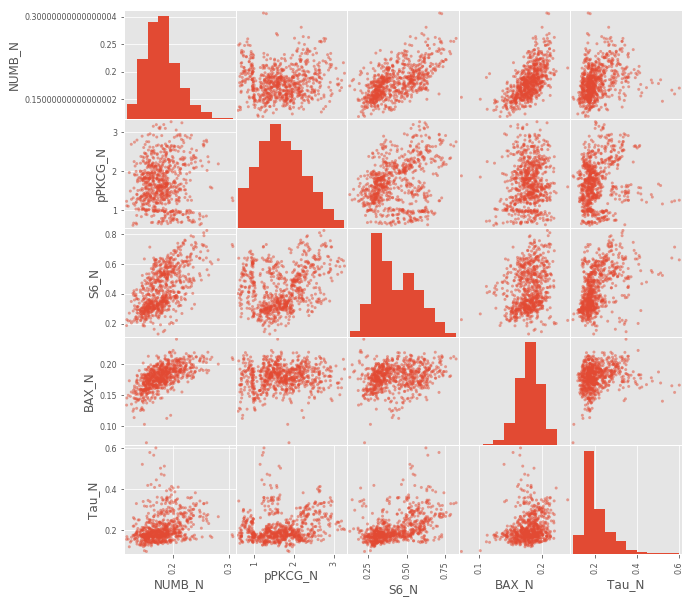

In [12]:
# Scatterplot Matrix
data = X2
scatter_matrix(data, figsize = (10,10))
plt.show()

# Logistic Discrimination for Mice Protein Expression

In [13]:
# Train logistic discriminant classifier using softmax

In [14]:
# selected features from dataset
X = X2.as_matrix()

# select class labels for train dataset
Y = Y2.as_matrix()

# K is the number of classes
K = len(np.unique(Y))

# bais vector intialized with zeros
b = np.zeros((1, K))

# intializing weight vector
W = np.random.uniform(-0.01, 0.01, size=(X.shape[1], K)) # [5,4]

# number of datapoints in the dataset
datapoints = X.shape[0]

# list to keep track of loss at each interation
lossHistory = []

# step-size for gradient descent
eta = 1
num_iterations = 1000


def softmax(z): 
    # unnormalized probabilities
    exp_z = np.exp(z)
    # normalized probabilities, all probabilities sum to one
    exp_z_sum = np.sum(exp_z, axis = 1, keepdims = True)
    return exp_z/exp_z_sum

def cross_entropy(X, Y, n):
    softmax_output = X.T
    # we want to calculate the loss for probailities that are assigned to correct class
    correct_class_prob = -np.log(softmax_output[Y.T, range(n)])
    loss = np.sum(correct_class_prob)/n
    return loss
    
def gradient(softmax_output,Y,n):
    g_softmax = softmax_output.T
    # subtract 1 from the correct class for each datapoint
    g_softmax[Y.T, range(n)] -=1
    g_softmax = g_softmax/n
    return g_softmax
    
for i in range(num_iterations):   
    # calculate class score and add b intercept
    z = np.dot(X,W) + b

    # calculate softmax output for each datapoint in each class
    softmax_output = softmax(z)

    # compute loss using cross entropy
    loss = cross_entropy(softmax_output, Y, datapoints)
    lossHistory.append(loss)
    if i%100 == 0:
        print('total loss at iteration ',i, 'is :', loss)
        
    # calcute gradient for loss function with respect to parameters
    # gradient of cross entropy loss function with softmax
    g_softmax = gradient(softmax_output,Y, datapoints)

    # update weight matrix W
    delta_W = np.dot(g_softmax, X)
    delta_W = (delta_W.T)
    W += -(eta)*delta_W

    # update bais matrix b
    delta_b = np.sum(delta_W, axis = 0, keepdims = True)
    b += -(eta)*delta_b




total loss at iteration  0 is : 2.079779753036828
total loss at iteration  100 is : 1.9708225774374042
total loss at iteration  200 is : 1.9205697555767145
total loss at iteration  300 is : 1.8847430626414694
total loss at iteration  400 is : 1.8555911476516866
total loss at iteration  500 is : 1.8307486099465755
total loss at iteration  600 is : 1.8091578358553655
total loss at iteration  700 is : 1.7901898273175725
total loss at iteration  800 is : 1.7734005110167919
total loss at iteration  900 is : 1.7584476607007082


Text(0.5,1,'Decrease in loss over 1000 iterations ')

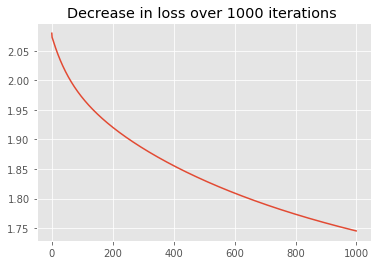

In [15]:
# plot graph of loss at each interation
plt.plot(range(1000), lossHistory)
plt.title("Decrease in loss over 1000 iterations ")

In [16]:
X2 = train_data.filter(items = ["NUMB_N", "pPKCG_N", "S6_N", "BAX_N", "Tau_N"]).as_matrix()
# select class labels for test dataset
Y2 = train_data.filter(items = ['class']).as_matrix()

In [17]:
# class_prediction with trained Weight matrix and b
z = np.dot(X,W) + b
softmax_pred_class = np.argmax(z, axis = 1)

accuracy = np.mean(np.equal(softmax_pred_class, Y))
print("Accuracy for training datatset is : %2f " % (accuracy*100), '%')

Accuracy for training datatset is : 12.906392  %


### Test dataset

In [18]:
X3 = test_data.filter(items = ["NUMB_N", "pPKCG_N", "S6_N", "BAX_N", "Tau_N"]).as_matrix()
# select class labels for test dataset
Y3 = test_data.filter(items = ['class']).as_matrix()

In [19]:
# class_prediction with trained Weight matrix and b
z = np.dot(X3,W) + b
softmax_pred_class = np.argmax(z, axis = 1)

accuracy = np.mean(np.equal(softmax_pred_class, Y3))
print("Accuracy for training datatset is : %2f " % (accuracy*100), '%')

Accuracy for training datatset is : 12.798127  %


# Training a Multilayer Perceptron

In [20]:
X = X2
Y = Y2

In [21]:
# number of input layer
N_input = X.shape[1]

# number of hidden layer
N_hidden = 100

# number of output layer
N_output = len(np.unique(Y))

# weight matrix from input to hidden layer
W1 = np.random.uniform(-0.01, 0.01,size=(N_input, N_hidden))

# bias vector from input to hidden layer
b1 = np.zeros((1, N_hidden))

# weight matrix from hidden to output layer
W2 = np.random.uniform(-0.01, 0.01 ,size= (N_hidden, N_output))

# bias matrix from hidden to output layer
b2 = np.zeros((1, N_output))

# list to keep track of loss at each iteration
lossHistoryMLP = []
step_size = 0.1
num_iterations = 10000


def sigmoid_func(x):
    return 1.0/(1+np.exp(-x))

def softmax(z):
    # unnormalized probabilities
    exp_z = np.exp(z)
    # normalized probabilities, all probabilities sum to one
    exp_z_sum = np.sum(exp_z, axis = 1, keepdims = True)
    return exp_z/exp_z_sum

def cross_entropy(X, Y, n):
    softmax_output = X.T
    # we want to calculate the loss for probailities that are assigned to correct class
    correct_class_prob = -np.log(softmax_output[Y.T, range(n)])
    loss = np.sum(correct_class_prob)/n
    return loss
    
def gradient(softmax_output,Y,n):
    g_softmax = softmax_output.T
    # subtract 1 from the correct class for each datapoint
    g_softmax[Y.T, range(n)] -=1
    g_softmax = g_softmax/n
    return g_softmax

for i in range(num_iterations):
    ## forward propagate
    # hidden layer output
    H_output = sigmoid_func(np.dot(X,W1) + b1)
    # softmax layer output
    z = np.dot(H_output, W2) + b2

    softmax_output = softmax(z)

    # compute loss with cross entropy
    loss = cross_entropy(softmax_output, Y, datapoints)
    lossHistoryMLP.append(loss)
    if i%1000 == 0:
        print('total loss at iteration ',i, 'is :', loss)

    # gardient of cross entropy with softmax
    g_softmax = gradient(softmax_output,Y, datapoints)

    # backward propagation
    delta_W2 = np.dot(H_output.T, g_softmax.T)
    delta_b2 = np.sum(g_softmax, axis = 1, keepdims = True)
    delta_b2 = delta_b2.T
    
    # gradient of hidden layer
    delta_hidden = np.dot(g_softmax.T, W2.T)
    
    # gradient of softmax 
    g_sigmoid = H_output * (1- H_output)
    
    # calculate delta w1
    delta_W1 = np.dot(X.T, delta_hidden * g_sigmoid)
    
    # calculate delta b1
    delta_b1 = np.sum(delta_hidden * g_sigmoid, axis =0, keepdims = True)
    
    # update all parameters
    W1 += -step_size * delta_W1
    b1 += -step_size * delta_b1
    W2 += -step_size * delta_W2
    b2 += -step_size * delta_b2


total loss at iteration  0 is : 2.079341495332934
total loss at iteration  1000 is : 2.066056925108111
total loss at iteration  2000 is : 1.9438004566178926
total loss at iteration  3000 is : 1.917351868206248
total loss at iteration  4000 is : 1.9094562959667298
total loss at iteration  5000 is : 1.8964787935477732
total loss at iteration  6000 is : 1.8648982987710925
total loss at iteration  7000 is : 1.8051019805679802
total loss at iteration  8000 is : 1.7449671647530127
total loss at iteration  9000 is : 1.7039222079972123


Text(0.5,1,'Decrease in loss over 10000 iterations')

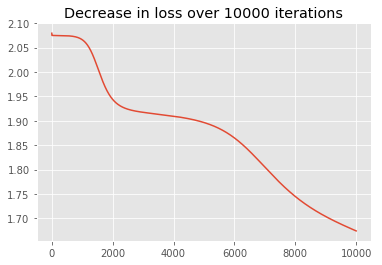

In [22]:
# plotting the loss 
plt.plot(range(10000), lossHistoryMLP)
plt.title("Decrease in loss over 10000 iterations")

In [23]:
# accuracy with the training dataset
H_output = sigmoid_func(np.dot(X2, W1) + b1)
pz = np.dot(H_output, W2) + b2
softmax_pred_output = np.argmax(z, axis=1)
Accuracy = np.mean(softmax_pred_output == Y2)
print("Accuracy for training datatset is : %2f " % (Accuracy*100), '%')

Accuracy for training datatset is : 12.818182  %


### Accuracy with test dataset

In [24]:
# accuracy with test dataset
H_output = sigmoid_func(np.dot(X3, W1) + b1)
z = np.dot(H_output, W2) + b2
softmax_pred_output = np.argmax(z, axis=1)
Accuracy = np.mean(softmax_pred_output == Y3)
print("Accuracy for training datatset is : %2f " % (Accuracy*100), '%')

Accuracy for training datatset is : 12.878252  %
